# Independent Study - Haesook Ma (Fall 2021)

## Overview

The datasets used in this study is the Admission Statistics of Major Tourist Attractions provided by a government-sponsored tourism research organization (Korea Culture and Tourist Institute, n.d.).

## Data Cleaning

In [5]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 8.7 MB/s            
     |████████████████████████████████| 1.1 MB 29.5 MB/s            
     |████████████████████████████████| 15.4 MB 39.7 MB/s            
     |████████████████████████████████| 6.3 MB 52.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from geopandas import geopandas
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

### South Korea Geo Data Import

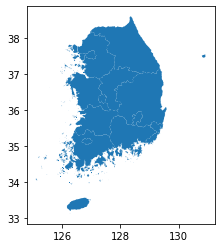

In [11]:
# Read the file
south_korea_map = geopandas.read_file('https://raw.githubusercontent.com/haesookma/haesookma.github.io/main/skorea-provinces-geo.json')

# only select province and geometry info
south_korea_map_simple = south_korea_map[['NAME_1', 'geometry']]

# rename the columns
south_korea_map_simple_rename = south_korea_map_simple.rename(columns={'NAME_1':'province', 'geometry': 'geometry'})

# create the plot
south_korea_map_simple.plot()
plt.show()

### Make data for geopandas plotting

In [17]:
# import the data (testing17.csv)
data = pd.read_csv('https://raw.githubusercontent.com/haesookma/haesookma.github.io/main/testing18.CSV', encoding= 'unicode_escape', thousands=',', skiprows=2)

# remove Korean names
# data_no_korean = data.drop(columns='tourist_spot_kor')

# select only the total number of tourists
data_total = data[(data.foreigner_local == 'Total')] 

# only select 'province', 'category', 'sub_category', '2016~2020'
data_total = data_total[['tourist_spot_eng','province', 'category', 'sub_category', '2016-Jan', '2016-Feb', '2016-Mar', '2016-Apr', '2016-May', '2016-Jun', '2016-Jul', '2016-Aug', '2016-Sep', '2016-Oct', '2016-Nov', '2016-Dec', '2017-Jan', '2017-Feb', '2017-Mar', '2017-Apr', '2017-May', '2017-Jun', '2017-Jul', '2017-Aug', '2017-Sep', '2017-Oct', '2017-Nov', '2017-Dec', '2018-Jan', '2018-Feb', '2018-Mar', '2018-Apr', '2018-May', '2018-Jun', '2018-Jul', '2018-Aug', '2018-Sep', '2018-Oct', '2018-Nov', '2018-Dec', '2019-Jan', '2019-Feb', '2019-Mar', '2019-Apr', '2019-May', '2019-Jun', '2019-Jul', '2019-Aug', '2019-Sep', '2019-Oct', '2019-Nov', '2019-Dec','2020-Jan', '2020-Feb', '2020-Mar', '2020-Apr', '2020-May', '2020-Jun', '2020-Jul', '2020-Aug', '2020-Sep', '2020-Oct', '2020-Nov', '2020-Dec']] # select 2020 data
data_total.head()

# make total columns
data_total['2016_total'] = data_total['2016-Jan'].values + data_total['2016-Feb'].values + data_total['2016-Mar'].values + data_total['2016-Apr'].values + data_total['2016-May'].values + data_total['2016-Jun'].values + data_total['2016-Jul'].values + data_total['2016-Aug'].values + data_total['2016-Sep'].values + data_total['2016-Oct'].values + data_total['2016-Nov'].values + data_total['2016-Dec'].values
data_total['2017_total'] = data_total['2017-Jan'].values + data_total['2017-Feb'].values + data_total['2017-Mar'].values + data_total['2017-Apr'].values + data_total['2017-May'].values + data_total['2017-Jun'].values + data_total['2017-Jul'].values + data_total['2017-Aug'].values + data_total['2017-Sep'].values + data_total['2017-Oct'].values + data_total['2017-Nov'].values + data_total['2017-Dec'].values
data_total['2018_total'] = data_total['2018-Jan'].values + data_total['2018-Feb'].values + data_total['2018-Mar'].values + data_total['2018-Apr'].values + data_total['2018-May'].values + data_total['2018-Jun'].values + data_total['2018-Jul'].values + data_total['2018-Aug'].values + data_total['2018-Sep'].values + data_total['2018-Oct'].values + data_total['2018-Nov'].values + data_total['2018-Dec'].values
data_total['2019_total'] = data_total['2019-Jan'].values + data_total['2019-Feb'].values + data_total['2019-Mar'].values + data_total['2019-Apr'].values + data_total['2019-May'].values + data_total['2019-Jun'].values + data_total['2019-Jul'].values + data_total['2019-Aug'].values + data_total['2019-Sep'].values + data_total['2019-Oct'].values + data_total['2019-Nov'].values + data_total['2019-Dec'].values
data_total['2020_total'] = data_total['2020-Jan'].values + data_total['2020-Feb'].values + data_total['2020-Mar'].values + data_total['2020-Apr'].values + data_total['2020-May'].values + data_total['2020-Jun'].values + data_total['2020-Jul'].values + data_total['2020-Aug'].values + data_total['2020-Sep'].values + data_total['2020-Oct'].values + data_total['2020-Nov'].values + data_total['2020-Dec'].values
data_total.head()

,tourist_spot_eng,province,category,sub_category,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,...,2020-Aug,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2016_total,2017_total,2018_total,2019_total,2020_total
2,Gas Science Museum,Incheon Metropolitan City,indoor,social,4942.0,2149.0,1597.0,6657.0,7620.0,8410.0,...,64.0,0.0,4527.0,4590.0,698.0,70758.0,59480.0,71013.0,70651.0,13823.0
5,Gachon Museum,Incheon Metropolitan City,indoor,history,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,0.0,229.0,326.0,92.0,NaN,NaN,13235.0,12642.0,1923.0
7,Ganghwa Agricultural Culture Center,Incheon Metropolitan City,indoor,social,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,15446.0,36383.0,4051.0
10,Ganghwa Tidalflat Center,Incheon Metropolitan City,outdoor,social,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,60.0,24.0,0.0,NaN,4988.0,4632.0,3322.0,274.0
13,Ganghwa Dolmen,Incheon Metropolitan City,outdoor,history,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# replace nan to 0
data_total_remove_nan = data_total.fillna(0)

# select data from 2016 to 2020
data_total_2016_to_2020 = data_total_remove_nan[['tourist_spot_eng','province', 'category', 'sub_category', '2016_total', '2017_total', '2018_total', '2019_total', '2020_total']]

In [20]:
# select only outdoor dataset and make the sum data by province
data_outdoor = data_total_2016_to_2020[(data_total_2016_to_2020.category == 'outdoor')]
data_outdoor_agg = data_outdoor.groupby('province').agg('sum')

In [21]:
# reset_index
data_outdoor_agg.reset_index(inplace=True)

In [22]:
# replace the names of province
data_outdoor_agg.at[3,'province'] = 'Daegu'
data_outdoor_agg.at[4,'province'] = 'Daejeon'
data_outdoor_agg.at[5,'province'] = 'Gangwon-do'
data_outdoor_agg.at[6,'province'] = 'Gwangju'
data_outdoor_agg.at[7,'province'] = 'Gyeonggi-do'
data_outdoor_agg.at[8,'province'] = 'Gyeongsangbuk-do'
data_outdoor_agg.at[9,'province'] = 'Gyeongsangnam-do'
data_outdoor_agg.at[10,'province'] = 'Incheon'
data_outdoor_agg.at[11,'province'] = 'Jeju'
data_outdoor_agg.at[12,'province'] = 'Jeollabuk-do'
data_outdoor_agg.at[13,'province'] = 'Jeollanam-do'
data_outdoor_agg.at[15,'province'] = 'Seoul'
data_outdoor_agg.at[16,'province'] = 'Ulsan'

In [23]:
# merge two datasets (one of south geo data and the outdoor data)

data_outdoor_agg_geo = pd.merge(south_korea_map_simple_rename, data_outdoor_agg,on = 'province')
data_outdoor_agg_geo.head()

,province,geometry,2016_total,2017_total,2018_total,2019_total,2020_total
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ...",3820069.0,4114637.0,4328955.0,6868015.0,2335228.0
1,Chungcheongbuk-do,"POLYGON ((128.02734 37.15823, 128.03488 37.155...",15860198.0,18873060.0,20530625.0,24443316.0,17765899.0
2,Chungcheongnam-do,"MULTIPOLYGON (((126.52458 36.03625, 126.52458 ...",11103324.0,12715014.0,13502459.0,15247572.0,13612837.0
3,Daegu,"POLYGON ((128.69171 35.96570, 128.69951 35.963...",7400601.0,8197463.0,8367513.0,9252873.0,7073995.0
4,Daejeon,"POLYGON ((127.33807 36.45684, 127.35730 36.454...",3044557.0,4463680.0,4195892.0,4264342.0,6335112.0


In [24]:
max_2020_total = data_outdoor_agg_geo['2020_total'].max()
min_2020_total = data_outdoor_agg_geo['2020_total'].min()

print(f'2020 Data Max: {max_2020_total}')
print(f'2020 Data Min: {min_2020_total}')

2020 Data Max: 34708910.0
2020 Data Min: 2165821.0


In [25]:
# Add Labels
data_outdoor_agg_geo['coords'] = data_outdoor_agg_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
data_outdoor_agg_geo['coords'] = [coords[0] for coords in data_outdoor_agg_geo['coords']]

### Map plot - no interactivity

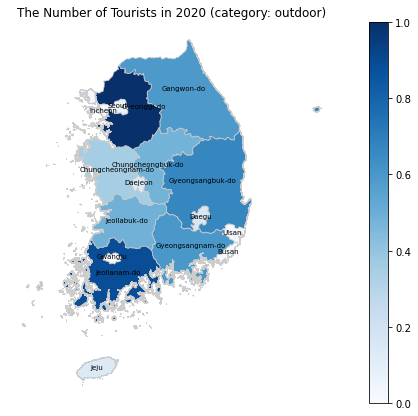

In [30]:
# set the value column that will be visualised
variable = '2020_total'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 7))

# remove the axis
ax.axis('off')

# add title
ax.set_title('The Number of Tourists in 2020 (category: outdoor)')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues')

# add the colorbar to the figure
fig.colorbar(sm)

sm.set_array([])

# make a label
for index, row in data_outdoor_agg_geo.iterrows():
    plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

# create map
map_plot = data_outdoor_agg_geo.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.show()

### Map plot - Interactivity included

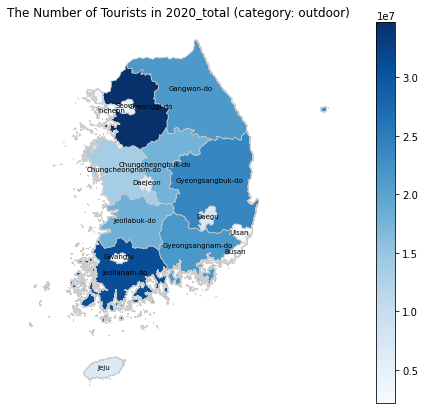

In [31]:
# Step 1: quick plot
variable = '2020_total'
fig, ax = plt.subplots(1, figsize=(12, 7))
ax.axis('off')
ax.set_title(f'The Number of Tourists in {variable} (category: outdoor)')

max_total = data_outdoor_agg_geo[variable].max()
min_total = data_outdoor_agg_geo[variable].min()
norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
sm = plt.cm.ScalarMappable(norm = norm, cmap='Blues')

fig.colorbar(sm)

for index, row in data_outdoor_agg_geo.iterrows():
    plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

map_plot = data_outdoor_agg_geo.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()

In [32]:
# step 2: make our fixed parameter an input to a function
def make_plot(variable):
    fig, ax = plt.subplots(1, figsize=(12, 7))
    ax.axis('off')
    ax.set_title(f'The Number of Tourists in {variable} (category: outdoor)')

    max_total = data_outdoor_agg_geo[variable].max()
    min_total = data_outdoor_agg_geo[variable].min()
    norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
    sm = plt.cm.ScalarMappable(norm = norm, cmap='Blues')

    fig.colorbar(sm)

    for index, row in data_outdoor_agg_geo.iterrows():
        plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

    map_plot = data_outdoor_agg_geo.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()

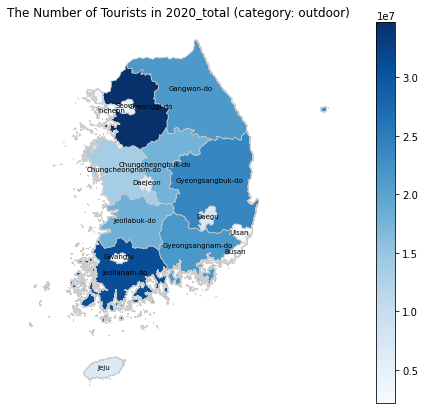

In [33]:
make_plot('2020_total')

In [34]:
w = widgets.Dropdown(
    options=['2016_total', '2017_total', '2018_total', '2019_total', '2020_total'],
    value='2019_total',
    description='Year:',
)

In [35]:
# step 3: make the function interactive with a ipywidget decorator
@widgets.interact(variable=w)
def make_plot(variable):
    fig, ax = plt.subplots(1, figsize=(12, 7))
    ax.axis('off')
    ax.set_title(f'The Number of Tourists in {variable} (category: outdoor)')

    max_total = data_outdoor_agg_geo[variable].max()
    min_total = data_outdoor_agg_geo[variable].min()
    norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
    sm = plt.cm.ScalarMappable(norm = norm, cmap='Blues')

    fig.colorbar(sm)

    for index, row in data_outdoor_agg_geo.iterrows():
        plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

    map_plot = data_outdoor_agg_geo.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()

interactive(children=(Dropdown(description='Year:', index=3, options=('2016_total', '2017_total', '2018_total'…

### Indoor plots

interactive plots

In [36]:
# select only indoor dataset and make the sum data by province
data_indoor = data_total_2016_to_2020[(data_total_2016_to_2020.category == 'indoor')]
data_indoor_agg = data_indoor.groupby('province').agg('sum')

# reset_index
data_indoor_agg.reset_index(inplace=True)

# replace the names of province
data_indoor_agg.at[3,'province'] = 'Daegu'
data_indoor_agg.at[4,'province'] = 'Daejeon'
data_indoor_agg.at[5,'province'] = 'Gangwon-do'
data_indoor_agg.at[6,'province'] = 'Gwangju'
data_indoor_agg.at[7,'province'] = 'Gyeonggi-do'
data_indoor_agg.at[8,'province'] = 'Gyeongsangbuk-do'
data_indoor_agg.at[9,'province'] = 'Gyeongsangnam-do'
data_indoor_agg.at[10,'province'] = 'Incheon'
data_indoor_agg.at[11,'province'] = 'Jeju'
data_indoor_agg.at[12,'province'] = 'Jeollabuk-do'
data_indoor_agg.at[13,'province'] = 'Jeollanam-do'
data_indoor_agg.at[15,'province'] = 'Seoul'
data_indoor_agg.at[16,'province'] = 'Ulsan'

# merge two datasets (one of south geo data and the outdoor data)

data_indoor_agg_geo = pd.merge(south_korea_map_simple_rename, data_indoor_agg, on = 'province')
# data_indoor_agg_geo.head()

# Add Labels
data_indoor_agg_geo['coords'] = data_indoor_agg_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
data_indoor_agg_geo['coords'] = [coords[0] for coords in data_indoor_agg_geo['coords']]

In [37]:
@widgets.interact(variable=w)
def make_plot(variable):
    fig, ax = plt.subplots(1, figsize=(12, 7))
    ax.axis('off')
    ax.set_title(f'The Number of Tourists in {variable} (category: indoor)')

    max_total = data_indoor_agg_geo[variable].max()
    min_total = data_indoor_agg_geo[variable].min()
    norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
    sm = plt.cm.ScalarMappable(norm = norm, cmap='Purples')

    fig.colorbar(sm)

    for index, row in data_indoor_agg_geo.iterrows():
        plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

    map_plot = data_indoor_agg_geo.plot(column=variable, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()

interactive(children=(Dropdown(description='Year:', index=4, options=('2016_total', '2017_total', '2018_total'…

### sub_category: nature

interactive plots

In [38]:
# select only indoor dataset and make the sum data by province
data_nature = data_total_2016_to_2020[(data_total_2016_to_2020.sub_category == 'nature')]
data_nature_agg = data_nature.groupby('province').agg('sum')

# reset_index
data_nature_agg.reset_index(inplace=True)

# replace the names of province
data_nature_agg.at[3,'province'] = 'Daegu'
data_nature_agg.at[4,'province'] = 'Daejeon'
data_nature_agg.at[5,'province'] = 'Gangwon-do'
data_nature_agg.at[6,'province'] = 'Gwangju'
data_nature_agg.at[7,'province'] = 'Gyeonggi-do'
data_nature_agg.at[8,'province'] = 'Gyeongsangbuk-do'
data_nature_agg.at[9,'province'] = 'Gyeongsangnam-do'
data_nature_agg.at[10,'province'] = 'Incheon'
data_nature_agg.at[11,'province'] = 'Jeju'
data_nature_agg.at[12,'province'] = 'Jeollabuk-do'
data_nature_agg.at[13,'province'] = 'Jeollanam-do'
data_nature_agg.at[15,'province'] = 'Seoul'
data_nature_agg.at[16,'province'] = 'Ulsan'

# merge two datasets (one of south geo data and the outdoor data)

data_nature_agg_geo = pd.merge(south_korea_map_simple_rename, data_nature_agg, on = 'province')

# Add Labels
data_nature_agg_geo['coords'] = data_nature_agg_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
data_nature_agg_geo['coords'] = [coords[0] for coords in data_nature_agg_geo['coords']]

In [39]:
@widgets.interact(variable=w)
def make_plot(variable):
    fig, ax = plt.subplots(1, figsize=(12, 7))
    ax.axis('off')
    ax.set_title(f'The Number of Tourists in {variable} (sub_category: nature)')

    max_total = data_nature_agg_geo[variable].max()
    min_total = data_nature_agg_geo[variable].min()
    norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
    sm = plt.cm.ScalarMappable(norm = norm, cmap='Greens')

    fig.colorbar(sm)

    for index, row in data_nature_agg_geo.iterrows():
        plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

    map_plot = data_nature_agg_geo.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()

interactive(children=(Dropdown(description='Year:', index=4, options=('2016_total', '2017_total', '2018_total'…

### sub_category: history

interactive plots

In [40]:
# select only indoor dataset and make the sum data by province
data_history = data_total_2016_to_2020[(data_total_2016_to_2020.sub_category == 'history')]
data_history_agg = data_history.groupby('province').agg('sum')

# reset_index
data_history_agg.reset_index(inplace=True)

# replace the names of province
data_history_agg.at[3,'province'] = 'Daegu'
data_history_agg.at[4,'province'] = 'Daejeon'
data_history_agg.at[5,'province'] = 'Gangwon-do'
data_history_agg.at[6,'province'] = 'Gwangju'
data_history_agg.at[7,'province'] = 'Gyeonggi-do'
data_history_agg.at[8,'province'] = 'Gyeongsangbuk-do'
data_history_agg.at[9,'province'] = 'Gyeongsangnam-do'
data_history_agg.at[10,'province'] = 'Incheon'
data_history_agg.at[11,'province'] = 'Jeju'
data_history_agg.at[12,'province'] = 'Jeollabuk-do'
data_history_agg.at[13,'province'] = 'Jeollanam-do'
data_history_agg.at[15,'province'] = 'Seoul'
data_history_agg.at[16,'province'] = 'Ulsan'

# merge two datasets (one of south geo data and the outdoor data)

data_history_agg_geo = pd.merge(south_korea_map_simple_rename, data_history_agg, on = 'province')

# Add Labels
data_history_agg_geo['coords'] = data_history_agg_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
data_history_agg_geo['coords'] = [coords[0] for coords in data_history_agg_geo['coords']]

In [41]:
@widgets.interact(variable=w)
def make_plot(variable):
    fig, ax = plt.subplots(1, figsize=(12, 7))
    ax.axis('off')
    ax.set_title(f'The Number of Tourists in {variable} (sub_category: history)')

    max_total = data_history_agg_geo[variable].max()
    min_total = data_history_agg_geo[variable].min()
    norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
    sm = plt.cm.ScalarMappable(norm = norm, cmap='Reds')

    fig.colorbar(sm)

    for index, row in data_history_agg_geo.iterrows():
        plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

    map_plot = data_history_agg_geo.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()

interactive(children=(Dropdown(description='Year:', index=4, options=('2016_total', '2017_total', '2018_total'…

### sub_category: social

interactive plots

In [42]:
# select only indoor dataset and make the sum data by province
data_social = data_total_2016_to_2020[(data_total_2016_to_2020.sub_category == 'social')]
data_social_agg = data_social.groupby('province').agg('sum')

# reset_index
data_social_agg.reset_index(inplace=True)

# replace the names of province
data_social_agg.at[3,'province'] = 'Daegu'
data_social_agg.at[4,'province'] = 'Daejeon'
data_social_agg.at[5,'province'] = 'Gangwon-do'
data_social_agg.at[6,'province'] = 'Gwangju'
data_social_agg.at[7,'province'] = 'Gyeonggi-do'
data_social_agg.at[8,'province'] = 'Gyeongsangbuk-do'
data_social_agg.at[9,'province'] = 'Gyeongsangnam-do'
data_social_agg.at[10,'province'] = 'Incheon'
data_social_agg.at[11,'province'] = 'Jeju'
data_social_agg.at[12,'province'] = 'Jeollabuk-do'
data_social_agg.at[13,'province'] = 'Jeollanam-do'
data_social_agg.at[15,'province'] = 'Seoul'
data_social_agg.at[16,'province'] = 'Ulsan'

# merge two datasets (one of south geo data and the outdoor data)

data_social_agg_geo = pd.merge(south_korea_map_simple_rename, data_social_agg, on = 'province')

# Add Labels
data_social_agg_geo['coords'] = data_social_agg_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
data_social_agg_geo['coords'] = [coords[0] for coords in data_social_agg_geo['coords']]

In [43]:
@widgets.interact(variable=w)
def make_plot(variable):
    fig, ax = plt.subplots(1, figsize=(12, 7))
    ax.axis('off')
    ax.set_title(f'The Number of Tourists in {variable} (sub_category: social)')

    max_total = data_social_agg_geo[variable].max()
    min_total = data_social_agg_geo[variable].min()
    norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
    sm = plt.cm.ScalarMappable(norm = norm, cmap='Greys')

    fig.colorbar(sm)

    for index, row in data_social_agg_geo.iterrows():
        plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

    map_plot = data_social_agg_geo.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()

interactive(children=(Dropdown(description='Year:', index=4, options=('2016_total', '2017_total', '2018_total'…

### sub_category: recreation

interactive plots

In [44]:
# select only indoor dataset and make the sum data by province
data_recreation = data_total_2016_to_2020[(data_total_2016_to_2020.sub_category == 'recreation')]
data_recreation_agg = data_recreation.groupby('province').agg('sum')

# reset_index
data_recreation_agg.reset_index(inplace=True)

# replace the names of province
data_recreation_agg.at[3,'province'] = 'Daegu'
data_recreation_agg.at[4,'province'] = 'Daejeon'
data_recreation_agg.at[5,'province'] = 'Gangwon-do'
data_recreation_agg.at[6,'province'] = 'Gwangju'
data_recreation_agg.at[7,'province'] = 'Gyeonggi-do'
data_recreation_agg.at[8,'province'] = 'Gyeongsangbuk-do'
data_recreation_agg.at[9,'province'] = 'Gyeongsangnam-do'
data_recreation_agg.at[10,'province'] = 'Incheon'
data_recreation_agg.at[11,'province'] = 'Jeju'
data_recreation_agg.at[12,'province'] = 'Jeollabuk-do'
data_recreation_agg.at[13,'province'] = 'Jeollanam-do'
data_recreation_agg.at[15,'province'] = 'Seoul'
data_recreation_agg.at[16,'province'] = 'Ulsan'

# merge two datasets (one of south geo data and the outdoor data)

data_recreation_agg_geo = pd.merge(south_korea_map_simple_rename, data_recreation_agg, on = 'province')

# Add Labels
data_recreation_agg_geo['coords'] = data_social_agg_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
data_recreation_agg_geo['coords'] = [coords[0] for coords in data_recreation_agg_geo['coords']]

In [45]:
@widgets.interact(variable=w)
def make_plot(variable):
    fig, ax = plt.subplots(1, figsize=(12, 7))
    ax.axis('off')
    ax.set_title(f'The Number of Tourists in {variable} (sub_category: recreation)')

    max_total = data_recreation_agg_geo[variable].max()
    min_total = data_recreation_agg_geo[variable].min()
    norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
    sm = plt.cm.ScalarMappable(norm = norm, cmap='Oranges')

    fig.colorbar(sm)

    for index, row in data_recreation_agg_geo.iterrows():
        plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

    map_plot = data_recreation_agg_geo.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()

interactive(children=(Dropdown(description='Year:', index=4, options=('2016_total', '2017_total', '2018_total'…

### sub_category: industrial

interactive plots

In [46]:
# select only indoor dataset and make the sum data by province
data_industrial = data_total_2016_to_2020[(data_total_2016_to_2020.sub_category == 'industrial')]
data_industrial_agg = data_industrial.groupby('province').agg('sum')

# reset_index
data_industrial_agg.reset_index(inplace=True)

# replace the names of province
data_industrial_agg.at[3,'province'] = 'Daegu'
data_industrial_agg.at[4,'province'] = 'Daejeon'
data_industrial_agg.at[5,'province'] = 'Gangwon-do'
data_industrial_agg.at[6,'province'] = 'Gwangju'
data_industrial_agg.at[7,'province'] = 'Gyeonggi-do'
data_industrial_agg.at[8,'province'] = 'Gyeongsangbuk-do'
data_industrial_agg.at[9,'province'] = 'Gyeongsangnam-do'
data_industrial_agg.at[10,'province'] = 'Incheon'
data_industrial_agg.at[11,'province'] = 'Jeju'
data_industrial_agg.at[12,'province'] = 'Jeollabuk-do'
data_industrial_agg.at[13,'province'] = 'Jeollanam-do'
data_industrial_agg.at[15,'province'] = 'Seoul'
data_industrial_agg.at[16,'province'] = 'Ulsan'

# merge two datasets (one of south geo data and the outdoor data)

data_industrial_agg_geo = pd.merge(south_korea_map_simple_rename, data_industrial_agg, on = 'province')

# Add Labels
data_industrial_agg_geo['coords'] = data_social_agg_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
data_industrial_agg_geo['coords'] = [coords[0] for coords in data_industrial_agg_geo['coords']]

In [47]:
@widgets.interact(variable=w)
def make_plot(variable):
    fig, ax = plt.subplots(1, figsize=(12, 7))
    ax.axis('off')
    ax.set_title(f'The Number of Tourists in {variable} (sub_category: industrial)')

    max_total = data_industrial_agg_geo[variable].max()
    min_total = data_industrial_agg_geo[variable].min()
    norm = matplotlib.colors.Normalize(vmin=min_total, vmax=max_total)
    sm = plt.cm.ScalarMappable(norm = norm, cmap='YlOrBr_r')

    fig.colorbar(sm)

    for index, row in data_industrial_agg_geo.iterrows():
        plt.annotate(text=row['province'], xy=row['coords'],horizontalalignment='center', size=7)

    map_plot = data_industrial_agg_geo.plot(column=variable, cmap='YlOrBr_r', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()

interactive(children=(Dropdown(description='Year:', index=4, options=('2016_total', '2017_total', '2018_total'…

## Reference

Korea Culture and Tourist Institute. (n.d.). *Statistics of visitors to major tourist attractions.* https://know.tour.go.kr/stat/visitStatDis/main.do